# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


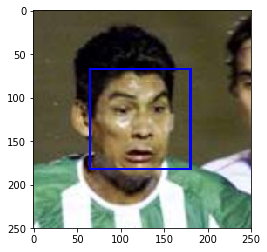

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

Percentage of faces detected in human data set: 100.0

Percentage of faces detected in dog data set: 18.0

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def human_detector(files):
    num_faces = 0
    for f in files:
        if face_detector(f):
            num_faces += 1

    return num_faces

print("Percentage of faces detected in human data set: {}".format(100.0 * human_detector(human_files_short) / len(human_files_short)))
print("Percentage of faces detected in dog data set: {}".format(100.0 * human_detector(dog_files_short) / len(dog_files_short)))

Percentage of faces detected in human data set: 100.0
Percentage of faces detected in dog data set: 18.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models
import torch.nn.functional as F

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    device = 'cuda'
    num_devices = torch.cuda.device_count()
else:
    device = 'cpu'
    num_devices = 1
    
VGG16 = VGG16.to(device)

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

default_image_size = 224

def get_image_transforms(image_size=default_image_size):
    tf = transforms.Compose([
            transforms.Resize((image_size, image_size)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
    ])
    
    return tf


def model_predict(model, img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    img = Image.open(img_path).convert('RGB')
    image_transforms = get_image_transforms()
    image_tensor = image_transforms(img)
    image_tensor.unsqueeze_(0)
    
    image_tensor = image_tensor.to(device)
    
    model.eval()
    out = model(image_tensor)
    
    max_tensor = F.softmax(out, dim=1).argmax(dim=1)
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    return  max_tensor.item()# predicted class index

def VGG16_predict(img_path):
    return model_predict(VGG16, img_path)

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, model=None):
    ## TODO: Complete the function.
    if model:
        idx = model_predict(model, img_path)
    else:
        idx = VGG16_predict(img_path)
        
    return (idx >= 151 and idx <= 268) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog? 

- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- 0% dogs detected in human faces

- 99% of dog_files_short have detected dogs in them

In [9]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def dog_percentage(files, model=None):
    num_dogs = 0
    
    for f in files:
        if dog_detector(f, model):
            num_dogs += 1
    
    return 100.0 * num_dogs / len(files)

print("Percentage of dogs detected in human pictures: {}".format(dog_percentage(human_files_short)))
print("Percentage of dogs detected in dog pictures: {}".format(dog_percentage(dog_files_short)))

Percentage of dogs detected in human pictures: 0.0
Percentage of dogs detected in dog pictures: 99.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [10]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
resnet50 = models.resnet50(pretrained=True)
resnet50.to(device)

print("Percentage of dogs detected in human pictures: {}".format(dog_percentage(human_files_short, resnet50)))
print("Percentage of dogs detected in dog pictures: {}".format(dog_percentage(dog_files_short, resnet50)))

Percentage of dogs detected in human pictures: 0.0
Percentage of dogs detected in dog pictures: 99.0


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [11]:
import os
from torchvision import datasets
from torch.utils.data import DataLoader

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 128 * num_devices
image_size_scratch = 224

train_dataset = datasets.ImageFolder('dogImages/train', get_image_transforms(image_size_scratch))
val_dataset = datasets.ImageFolder('dogImages/valid', get_image_transforms(image_size_scratch))
test_dataset = datasets.ImageFolder('dogImages/test', get_image_transforms(image_size_scratch))

train_dataloader = DataLoader(train_dataset, batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size, shuffle=True)

loaders_scratch = {
    'train': train_dataloader,
    'valid': val_dataloader,
    'test': test_dataloader
}

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

- The code resizes the image to 224x224 by stretching/shrinking it to that dimension. The reason for this is that this is the minimum size required by the pretrained torchvision models. Going larger than this wasn't an option as it was becoming an issue with GPU memory. Going smaller than this was an option, but I didn't want to lose data and/or introduce compression artifacts.

- I didn't augment the dataset other than shuffling it. The main reason for this is that when I looked through the data, the dogs in the images were more or less centered and were all "right side up". Also, practically, while pictures of objects like fruit can be rotated, pictures of dogs are seldom rotated or off center. The other option was grayscale, but given color is important (e.g different colored labs), I chose not to do that 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, image_size=default_image_size):
        super(Net, self).__init__()
        
        self.image_size = image_size
        
        self.conv1_depth = 16
        self.conv2_depth = 32
        self.conv3_depth = 64
        
        self.fc1_input_size = self.image_size * self.image_size * self.conv3_depth // 64
        self.fc1_size = 256#1024
        self.fc2_size = 256#1024
        
        self.num_classes = 133
        
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, self.conv1_depth, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(self.conv1_depth, self.conv2_depth, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(self.conv2_depth, self.conv3_depth, kernel_size=3, stride=1, padding=1)
        
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)  
        self.avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(self.fc1_input_size, self.fc1_size)        
        self.fc2 = nn.Linear(self.fc1_size, self.fc2_size)        
        self.output = nn.Linear(self.fc2_size, self.num_classes)
    
        self.bn1 = nn.BatchNorm2d(self.conv1_depth)
        self.bn2 = nn.BatchNorm2d(self.conv2_depth)
        self.bn3 = nn.BatchNorm2d(self.conv3_depth)
        
        self.dropout = nn.Dropout(0.6)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.conv1(x)
        x = F.relu(x)
        x = self.bn1(x)
        x = self.maxpool(x)
        
        x = self.conv2(x)
        x = F.relu(x)
        x = self.bn2(x)        
        x = self.maxpool(x)
        
        x = self.conv3(x)
        x = F.relu(x)
        x = self.bn3(x)        
        x = self.maxpool(x)
        
        x = x.view(-1, self.fc1_input_size)
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        x = self.output(x)
        x = F.relu(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net(image_size=image_size_scratch)

# move tensors to GPU if CUDA is available
#if use_cuda:
#    model_scratch.cuda()

if num_devices > 1:
    model_scratch = nn.DataParallel(model_scratch)

model_scratch.to(device)

DataParallel(
  (module): Net(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (avgpool): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (fc1): Linear(in_features=50176, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=256, bias=True)
    (output): Linear(in_features=256, out_features=133, bias=True)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (dropout): Dropout(p=0.6)
  )
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

##### Initial setup #####

I chose to start simple. I created a simple network with the following layers:
```
Input -> Conv (16 deep) -> Maxpool(2) -> Conv (32 deep) -> Maxpool(2) -> FC(1024) -> output
```
The performance of this network was quite poor with both the training and cross validation loss staying stuck around 4.8 with an accuracy of about 1% on validation and test sets. 

This seemed to imply that the model was underfitting, so I increased the number of convolutional layers to 3 and added an additional hidden layer to the fully connected layer. The new architecture was now:
```
Input -> Conv (16 deep) -> Maxpool(2) -> Conv (32 deep) -> Maxpool(2) -> Conv (64 deep) -> Maxpool(2) -> FC(1024) -> FC(1024) -> output
```    
    
This didn't change things, so it implied there might be a lot of noise in the training and made me look at the batch size. Given the findings in [Systematic evaluation of CNN advances on the ImageNet](https://arxiv.org/pdf/1606.02228.pdf), I made two changes:
    
1. I set the batch size to 128
    
2. I changed the optimizer to SGD with a momentum of 0.9
    
This solved the problem and the training and validation loss started decreasing until about the 10th epoch. At this point, the accuracy on the validation set was still only around 4%. Given the training loss was still decreasing and but the validation loss was increasing indicated that the model might be overfitting. 

##### Dealing with overfitting #####

Given the network was likely overfitting, I took the following steps to address it.

First, I added dropout layers with a dropout probability of 0.5. This helped get the loss to around 4.09 and with an accuracy of ~9% on the validation set and 8% on the test set. This was significantly better, but not good enough.

Another common approach to dealing with overfitting is decreasing the number of hidden units. I tried changing the two FC layers to have 512 nodes each, but that produced worse results. I didn't try decreasing the FC layer anymore. I then tried increasing the dropout to 0.6, but that too produced worse results. I didn't try increasing the dropout probability after this.
    
The next step was to look into batch normalization. I added batch normalization between the convolutional layers. This made the network too big to fit into GPU memory, so I had to do the batch normalization on CPU instead of the GPU. This resulted in a slowdown of about a factor of 5 in training speed, but by the 19th epoch I saw the validation loss go to 3.98 with a validation accuracy of 11% on the validation set and 10% in the training set after about 18 epochs. This was promising. 

Given the slow training speed, I reduced the FC layers to have 256 nodes so it all fit in GPU memory. This worked well and I had a loss of 3.94 with an accuracy of 10.3% on the validation set and 11% on the test set.

##### Eking out some more accuracy #####
The model now was good enough to score above 10% on the test set, but I wanted to see if I could go further without altering the architecture. I had noticed that around epoch 20, the training and validation set losses diverge with the validation loss stagnating around 3.9. I wanted to see if an adaptive learning rate would work. So I implemented a StepLR adaptive learning rate scheduler. This helped some more and reduced the validation loss to 3.8 with validation loss of 13.7% and a training set loss of 13%

##### Future work #####
The adaptive learning rate implementation is fairly basic and could use a more intelligent learning rate. This could perhaps get another percent in accuracy. 

To drive the accuracy even further, the next step would be to make the network deeper. This presents a challenge as I would run out of RAM. Right now I have two GPUs and am using them to parallelize training by splitting along the batch dimension using PyTorch's `DataParallel`. The upside of this is that I'm training twice as many batches. The downside is that I am limited by the memory capacity of a single card. I could instead split the model across two GPUs effectively doubling the memory capacity, but trading off training speed. This would also mean I would have to move data between the GPUs which would further incur a penalty on training time.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [13]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.01, momentum=0.9) 

scheduler_scratch = optim.lr_scheduler.StepLR(optimizer_scratch, step_size=20, gamma=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [14]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    early_stop_threshold = 10
    early_stop_counter = 0
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        val_correct_preds = 0
        val_dataset_size = 0
        
        scheduler_scratch.step()
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer_scratch.zero_grad()
            
            output = model(data)
            loss = criterion_scratch(output, target)
            loss.backward()
            optimizer.step()
            
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            output = model(data)
            loss = criterion_scratch(output, target)
            
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
            pred = output.data.max(1, keepdim=True)[1]
            # compare predictions to true label
            val_correct_preds += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
            val_dataset_size += data.size(0)

        model.train()
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \t Validation accuracy: {:.2f}'.format(
            epoch, 
            train_loss,
            valid_loss,
            100.0 * val_correct_preds / val_dataset_size
            ))
        
        ## TODO: save the model if validation loss has decreased        
        if valid_loss < valid_loss_min:
            print("Validation loss lower than previous min. Saving model...")
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter > early_stop_threshold:
                print("Early stopping...")
                break
            
    # return trained model
    return model


# train the model
num_epochs = 100
model_scratch = train(num_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 4.896466 	Validation Loss: 4.881882 	 Validation accuracy: 0.84
Validation loss lower than previous min. Saving model...
Epoch: 2 	Training Loss: 4.887886 	Validation Loss: 4.836844 	 Validation accuracy: 3.47
Validation loss lower than previous min. Saving model...
Epoch: 3 	Training Loss: 4.842320 	Validation Loss: 4.790805 	 Validation accuracy: 3.71
Validation loss lower than previous min. Saving model...
Epoch: 4 	Training Loss: 4.772282 	Validation Loss: 4.684751 	 Validation accuracy: 4.67
Validation loss lower than previous min. Saving model...
Epoch: 5 	Training Loss: 4.711143 	Validation Loss: 4.624503 	 Validation accuracy: 4.91
Validation loss lower than previous min. Saving model...
Epoch: 6 	Training Loss: 4.629780 	Validation Loss: 4.575175 	 Validation accuracy: 5.39
Validation loss lower than previous min. Saving model...
Epoch: 7 	Training Loss: 4.563065 	Validation Loss: 4.516776 	 Validation accuracy: 5.51
Validation loss lower than previous

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.781798


Test Accuracy: 13% (110/836)


In [17]:
#try to free up memory on the GPU 
torch.cuda.empty_cache()

del model_scratch 

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [18]:
## TODO: Specify data loaders
loaders_transfer = {
    'train': train_dataloader,
    'valid': val_dataloader,
    'test': test_dataloader
}

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [19]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = VGG16

# freeze params
for param in model_transfer.parameters():
    param.requires_grad = False

model_transfer.classifier[6] = nn.Linear(4096, 133)

if num_devices > 1:
    model_transfer = nn.DataParallel(model_transfer)

model_transfer = model_transfer.to(device)

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

##### Initial setup #####

Like in the CNN from scratch, I started simple. I figured that VGG was trained on ImageNet and since the training data was taken from ImageNet, I'd likely be able to reuse a lot of the network. So I only replaced the output layer to have 133 outputs instead of 1000 and trained the network. This worked remarkably well with the model getting an accuracy of 74% on the validation set in the first epoch! However, both the training and validation loss increased dramatically starting the second epoch indicating that the learning rate of 0.01 was too high.

##### Changing the learning rate #####
Changing the learning rate to 0.001 fixed the problem of the exploding loss and the model gave an accuracy of 82% after above 5 epochs.

##### Playing with the learning rate #####
Much like the "from scratch" model, I wanted to see if I could eke out another percent or so from the learning rate. I implemented a `ReduceLROnPlateau` scheduler but this didn't seem to make a big difference. There's some tweaking I could likely do with the learning rate and the momentum of the SGD but I chose to stop since the accuracy was already reasonably high.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [21]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.001)

scheduler_transfer = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer_transfer, 
    mode='min', 
    factor=0.5, 
    patience=5, 
    threshold=0.001, 
    threshold_mode='abs', 
    min_lr=1e-6)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [22]:
# train the model
model_transfer = train(num_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 4.309581 	Validation Loss: 2.658537 	 Validation accuracy: 53.77
Validation loss lower than previous min. Saving model...
Epoch: 2 	Training Loss: 1.699659 	Validation Loss: 0.954619 	 Validation accuracy: 71.98
Validation loss lower than previous min. Saving model...
Epoch: 3 	Training Loss: 0.820329 	Validation Loss: 0.598261 	 Validation accuracy: 81.56
Validation loss lower than previous min. Saving model...
Epoch: 4 	Training Loss: 0.612384 	Validation Loss: 0.528720 	 Validation accuracy: 82.51
Validation loss lower than previous min. Saving model...
Epoch: 5 	Training Loss: 0.555642 	Validation Loss: 0.509665 	 Validation accuracy: 83.71
Validation loss lower than previous min. Saving model...
Epoch: 6 	Training Loss: 0.630970 	Validation Loss: 0.710028 	 Validation accuracy: 84.43
Epoch: 7 	Training Loss: 0.593875 	Validation Loss: 0.622491 	 Validation accuracy: 85.63
Epoch: 8 	Training Loss: 0.574836 	Validation Loss: 0.740084 	 Validation accuracy: 8

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [23]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

In [24]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.700497


Test Accuracy: 82% (691/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [25]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
    
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    return class_names[model_predict(model_transfer, img_path)]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [26]:
def display_image(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()    

In [27]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    display_image(img_path)
    
    if dog_detector(img_path, resnet50):
        print("Dog detected. Breed: {}".format(predict_breed_transfer(img_path)))
    elif face_detector(img_path):
        print("Human detected. Looks like a {}".format(predict_breed_transfer(img_path)))
    else:
        print("Error! Not human or dog")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

The output of the classifier, while pretty good, is still worse than what I expected. Dog breeds are a relatively small class and we should be able to get higher accuracy. On the positive side, it didn't think cats were dogs :)

In order to improve the accuracy, here are some options I would explore:

1. Have more data of dogs that are similar (e.g curly coated retriever and American water spaniel)

2. I chose a relatively lightweight approach to for `model_transfer` by just replacing the output layer and training the weights for that layer. One option to explore would be to apply "fine tuning" as described in the lectures. This would mean training the entire VGG network though.

3. I was forced to compress the images to 224x224 for memory reasons. However, many of the images are larger than this, and more importantly not square. This messes up the aspect ratio which could affect what the model learns. As mentioned previously, if I could split this model across two GPUs, I'd be able to process larger images.


test-examples/Savannah-cat-example.jpg


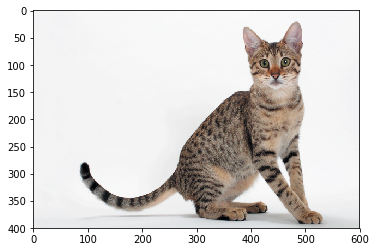

Error! Not human or dog

test-examples/Curly-coated_retriever_03896.jpg


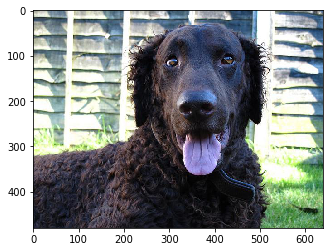

Dog detected. Breed: Curly-coated retriever

test-examples/johnny-depp-example.jpg


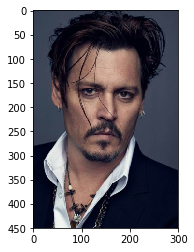

Human detected. Looks like a Brittany

test-examples/Labrador_retriever_06455.jpg


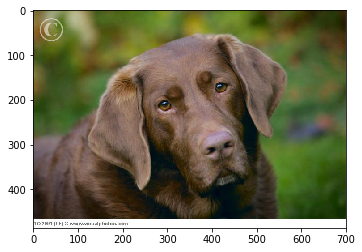

Dog detected. Breed: Labrador retriever

test-examples/Welsh_springer_spaniel_08203.jpg


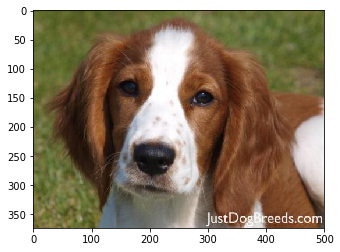

Dog detected. Breed: Welsh springer spaniel

test-examples/American_water_spaniel_00648.jpg


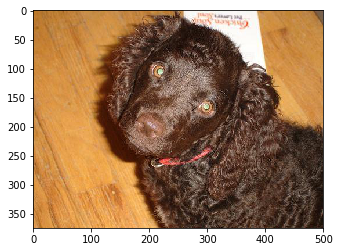

Dog detected. Breed: Curly-coated retriever

test-examples/Cat-example.jpg


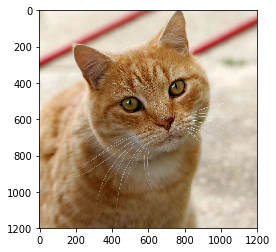

Error! Not human or dog

test-examples/German-Shepherd-example.jpg


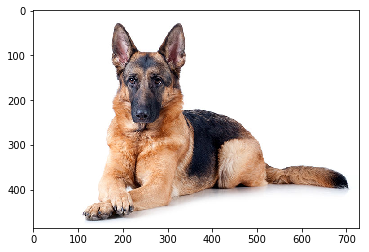

Dog detected. Breed: German shepherd dog

test-examples/brad-pitt-example.jpg


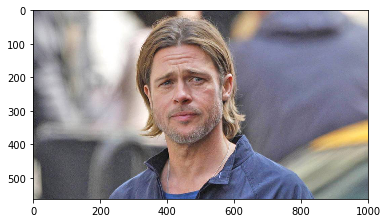

Human detected. Looks like a Dachshund

test-examples/Golden-Retriever-example.jpg


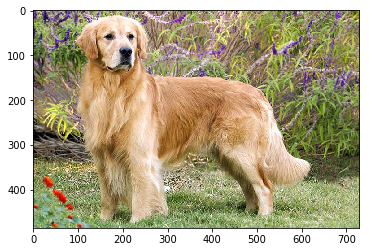

Dog detected. Breed: Golden retriever

test-examples/Labrador_retriever_06449.jpg


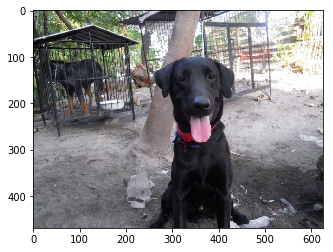

Dog detected. Breed: Labrador retriever

test-examples/Brittany_02625.jpg


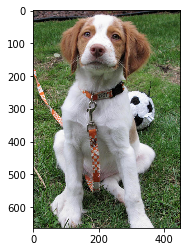

Dog detected. Breed: Brittany


In [36]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

def get_image_paths(dirname):
    filenames = os.listdir(dirname)
    file_paths = [dirname + "/" + f for f in filenames]
    
    return file_paths
    
## suggested code, below
files = get_image_paths('test-examples')
for file in files:
    print("\n" + file)
    run_app(file)